In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
df_front_auto = pd.read_csv('/content/drive/MyDrive/ODE/front_auto_grouped_data.csv')
df_back_auto = pd.read_csv('/content/drive/MyDrive/ODE/back_auto_except_grouped_data.csv')
df_front_manual = pd.read_csv('/content/drive/MyDrive/ODE/front_manual_grouped_data.csv')
df_back_manual = pd.read_csv('/content/drive/MyDrive/ODE/back_manual_grouped_data.csv')

In [41]:
df_front_auto.head()

,Unnamed: 0,time (hr),Front_auto_Normalization (ug),Front_auto_Normalization (ug).1
0,NaN,NaN,mean,std
1,0.0,0.016667,0.20372905733910332,0.17379973754926256
2,1.0,0.033333,0.8322915893524091,0.30753317798014657
3,2.0,0.050000,2.7383459703518276,1.547125319056773
4,3.0,0.066667,3.8888631783808543,1.8940310587794145


In [42]:
front_auto_time = df_front_auto['time (hr)'][1:]
front_auto_mean = df_front_auto['Front_auto_Normalization (ug)'][1:].astype(float)
front_auto_std = df_front_auto['Front_auto_Normalization (ug).1'][1:].astype(float)
back_auto_time = df_back_auto['time (hr)'][1:]
back_auto_mean = df_back_auto['Back_auto_Normalization_except0731 (ug)'][1:].astype(float)
back_auto_std = df_back_auto['Back_auto_Normalization_except0731 (ug).1'][1:].astype(float)
front_manual_time = df_front_manual['time (hr)'][1:]
front_manual_mean = df_front_manual['Front_manual_Normalization (ug)'][1:].astype(float)
front_manual_std = df_front_manual['Front_manual_Normalization (ug).1'][1:].astype(float)
back_manual_time = df_back_manual['time (hr)'][1:]
back_manual_mean = df_back_manual['Back_manual_Normalization (ug)'][1:].astype(float)
back_manual_std = df_back_manual['Back_manual_Normalization (ug).1'][1:].astype(float)

In [38]:
from scipy.optimize import curve_fit

def sigmoid(x, L ,x0, k):
    y = L / (1 + np.exp(-k*(x-x0)))
    return (y)

p0 = [1,1,1] # this is an mandatory initial guess

popt_front_auto, pcov_front_auto = curve_fit(sigmoid, front_auto_time, front_auto_mean, p0, method='dogbox')
popt_back_auto, pcov_back_auto = curve_fit(sigmoid, back_auto_time, back_auto_mean, p0, method='dogbox')
popt_front_manual, pcov_front_manual = curve_fit(sigmoid, front_manual_time, front_manual_mean, p0, method='dogbox')
popt_back_manual, pcov_back_manual = curve_fit(sigmoid, back_manual_time, back_manual_mean, p0, method='dogbox')

In [39]:
# prompt: derivate sigmoid(front_auto_time, *popt)

def sigmoid_derivative(x, L, x0, k):
    s = sigmoid(x, L, x0, k)
    return k * s * (1 - s / L)


<ipython-input-67-15192471e46f>:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(front_auto_time, front_auto_mean, yerr=front_auto_std,
<ipython-input-67-15192471e46f>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(back_auto_time, back_auto_mean, yerr=back_auto_std,
<ipython-input-67-15192471e46f>:40: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(front_manual_time, front_manual_mean, yerr=front_manual_std,
<ipython-input-67-15192471e46f>:57: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.er

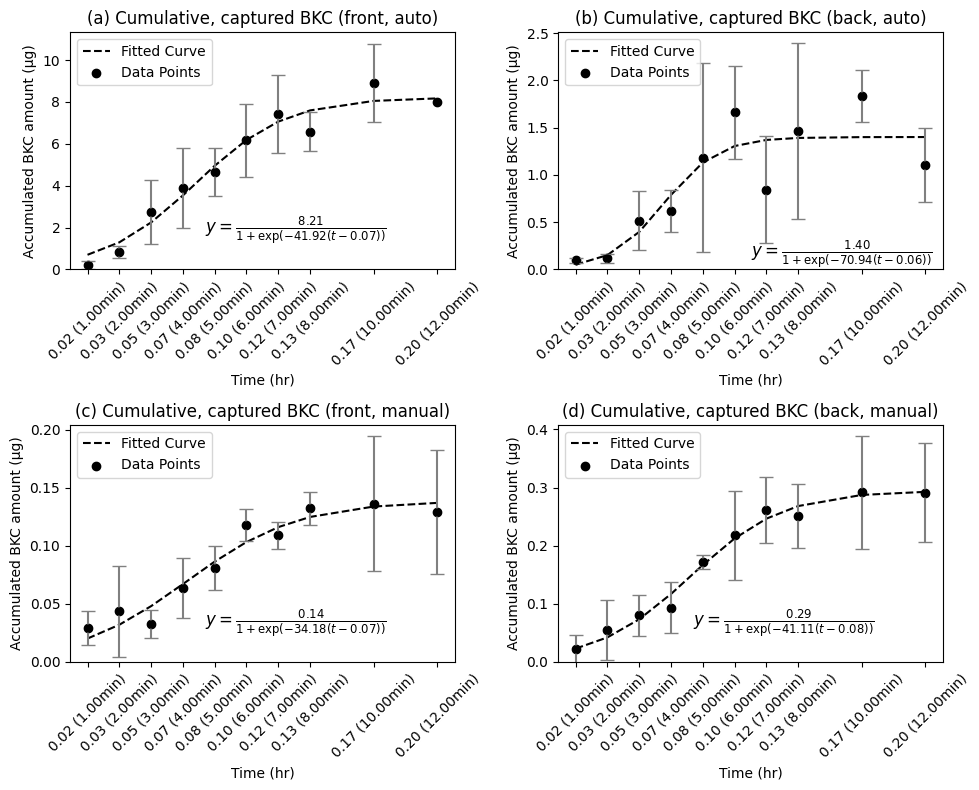

In [67]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(front_auto_time, sigmoid(front_auto_time, *popt_front_auto), label='Fitted Curve', color='black', linestyle='--')
plt.scatter(front_auto_time, front_auto_mean, label='Data Points', color='black')
plt.errorbar(front_auto_time, front_auto_mean, yerr=front_auto_std,
             fmt='o', ecolor='gray', capsize=5, linestyle='', color = 'black', marker='o', markersize=5)
plt.title('(a) Cumulative, captured BKC (front, auto)')
xticks_labels = [f'{hour:.2f} ({hour*60:.2f}min)' for hour in front_auto_time]
yticks_labels = [f'{value:.2f}' for value in front_auto_mean]
plt.xticks(front_auto_time, xticks_labels, rotation=45)
plt.xlabel('Time (hr)')
plt.ylabel('Accumulated BKC amount (μg)')
latex_str = (r'$y = \frac{{{:.2f}}}{{1 + \exp(-{:.2f}(t - {:.2f}))}}$'
             .format(popt_front_auto[0], popt_front_auto[2], popt_front_auto[1]))
plt.text(0.35, 0.15, latex_str, transform=plt.gca().transAxes, fontsize=12)
plt.ylim(bottom=0)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(back_auto_time, sigmoid(back_auto_time, *popt_back_auto), label='Fitted Curve', color='black', linestyle='--')
plt.scatter(back_auto_time, back_auto_mean, label='Data Points', color='black')
plt.errorbar(back_auto_time, back_auto_mean, yerr=back_auto_std,
             fmt='o', ecolor='gray', capsize=5, linestyle='', color = 'black', marker='o', markersize=5)
plt.title('(b) Cumulative, captured BKC (back, auto)')
xticks_labels = [f'{hour:.2f} ({hour*60:.2f}min)' for hour in back_auto_time]
yticks_labels = [f'{value:.2f}' for value in back_auto_mean]
plt.xticks(back_auto_time, xticks_labels, rotation=45)
plt.xlabel('Time (hr)')
plt.ylabel('Accumulated BKC amount (μg)')
latex_str = (r'$y = \frac{{{:.2f}}}{{1 + \exp(-{:.2f}(t - {:.2f}))}}$'
             .format(popt_back_auto[0], popt_back_auto[2], popt_back_auto[1]))
plt.text(0.5, 0.05, latex_str, transform=plt.gca().transAxes, fontsize=12)
plt.ylim(bottom=0)
plt.legend(loc='upper left')

plt.subplot(2, 2, 3)
plt.plot(front_manual_time, sigmoid(front_manual_time, *popt_front_manual), label='Fitted Curve', color='black', linestyle='--')
plt.scatter(front_manual_time, front_manual_mean, label='Data Points', color='black')
plt.errorbar(front_manual_time, front_manual_mean, yerr=front_manual_std,
             fmt='o', ecolor='gray', capsize=5, linestyle='', color = 'black', marker='o', markersize=5)
plt.title('(c) Cumulative, captured BKC (front, manual)')
xticks_labels = [f'{hour:.2f} ({hour*60:.2f}min)' for hour in front_manual_time]
yticks_labels = [f'{value:.2f}' for value in front_manual_time]
plt.xticks(front_manual_time, xticks_labels, rotation=45)
plt.xlabel('Time (hr)')
plt.ylabel('Accumulated BKC amount (μg)')
latex_str = (r'$y = \frac{{{:.2f}}}{{1 + \exp(-{:.2f}(t - {:.2f}))}}$'
             .format(popt_front_manual[0], popt_front_manual[2], popt_front_manual[1]))
plt.text(0.35, 0.15, latex_str, transform=plt.gca().transAxes, fontsize=12)
plt.ylim(bottom=0)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(back_manual_time, sigmoid(back_manual_time, *popt_back_manual), label='Fitted Curve', color='black', linestyle='--')
plt.scatter(back_manual_time, back_manual_mean, label='Data Points', color='black')
plt.errorbar(back_manual_time, back_manual_mean, yerr=back_manual_std,
             fmt='o', ecolor='gray', capsize=5, linestyle='', color = 'black', marker='o', markersize=5)
plt.title('(d) Cumulative, captured BKC (back, manual)')
xticks_labels = [f'{hour:.2f} ({hour*60:.2f}min)' for hour in back_manual_time]
yticks_labels = [f'{value:.2f}' for value in back_manual_time]
plt.xticks(back_manual_time, xticks_labels, rotation=45)
plt.xlabel('Time (hr)')
plt.ylabel('Accumulated BKC amount (μg)')
latex_str = (r'$y = \frac{{{:.2f}}}{{1 + \exp(-{:.2f}(t - {:.2f}))}}$'
             .format(popt_back_manual[0], popt_back_manual[2], popt_back_manual[1]))
plt.text(0.35, 0.15, latex_str, transform=plt.gca().transAxes, fontsize=12)
plt.ylim(bottom=0)
plt.legend()

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ODE/Figure/sigmodial_with_errorbar.tif')
plt.show()


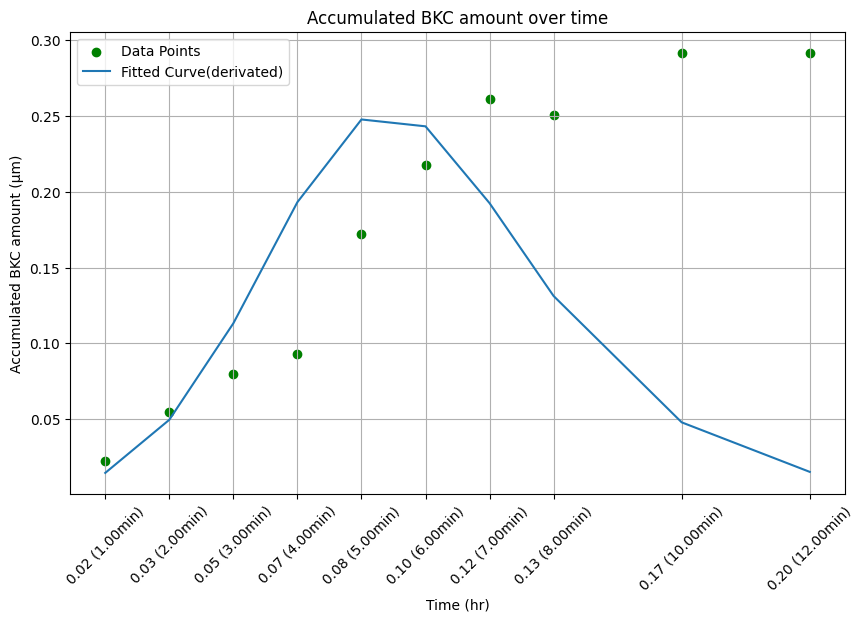

In [33]:
# Plotting
plt.figure(figsize=(10, 6))
#plt.plot(front_auto_time, sigmoid(front_auto_time, *popt), label='Fitted Curve', color='red', linestyle='--')
plt.scatter(front_auto_time, front_auto_mean, label='Data Points', color='green')
plt.plot(front_auto_time, sigmoid_derivative(front_auto_time, *popt)*front_auto_time, label='Fitted Curve(derivated)')
plt.legend()

plt.title('Accumulated BKC amount over time')
xticks_labels = [f'{hour:.2f} ({hour*60:.2f}min)' for hour in front_auto_time]
yticks_labels = [f'{value:.2f}' for value in front_auto_mean]
plt.xticks(front_auto_time, xticks_labels, rotation=45)
plt.xlabel('Time (hr)')
plt.ylabel('Accumulated BKC amount (μm)')
# plt.text(0.5, 0.4, f'y = {popt[0]:.2f} / (1 + exp(-{popt[2]:.2f} * (x - {popt[1]:.2f})))',
#             transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.savefig('/content/drive/MyDrive/ODE/Figure/accu_back_manual_derive.tif')
plt.show()

In [ ]:
plt.savefig('/content/drive/MyDrive/ODE/plot.png')